### Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.

### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

# Summary of Recommendations

## Data Exploration

- Browsed the data set and evaluated the number of unique values in each column. If there is only one unique value, that is not relevant to the outcome. There were atleast two values in each column

- Next if there are any columns with significant dataset leaning towards one outcome. Like for example, out of a total number of records if most were causing the outcome to be one result, that may not be useful column. I observed that car column has a large number of missing values
 

## Findings

- 15% of people over 25 visit bars, and 6.2% of people accept coupons

- Widowed with adult passengers are likely to accept coupons 8.2% of the time. Almost twice higher compared to those over 30 driving alone

- Younger demographic seems to accept coupons at a higher rate at 7am for carryout food. This could be because they are making a quick stop for a breakfast and coffee stop

- Divorced males with adult passengers have a higher probability (88%) of accepting coupons at 2pm for coffee houses or low cost restaurants


## Takeaways

- There is a mechanical aspect to data analysis. With each dataset, the process involves identifying what columns exist, whether the columns have a even distribution of data that contributes to the outcome, or not.  The analysis automatically engages the human perspective with the data and it is quite seamless. The key is to engage with the data

- Some tips and tricks are - to see if there are unique values with non-uniform distribution and not include them. Understand which column unique values seem to have the largest impact on the outcome desired via queries on the dataset. Evaluate combinations of demographics and see what has the most impact. Some results may seem out of place - like why are coupons accepted at a higher rate at 7AM in the morning. Looking a little deeper, I found the younger demographic seems to order takeouts at Coffee bars. That is very interesting insight. 

In [193]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.

In [194]:
# read the data
df = pd.read_csv('data/coupons.csv')
df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [195]:
# check the shape (number of rows and columns) of the dataframe
df.shape

(12684, 26)

In [196]:
# what are the columns in the dataframe?
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

2. Investigate the dataset for missing or problematic data.

In [197]:
# number of unique values in each column
df.nunique()


destination              3
passanger                4
weather                  3
temperature              3
time                     5
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
has_children             2
education                6
occupation              25
income                   9
car                      5
Bar                      5
CoffeeHouse              5
CarryAway                5
RestaurantLessThan20     5
Restaurant20To50         5
toCoupon_GEQ5min         1
toCoupon_GEQ15min        2
toCoupon_GEQ25min        2
direction_same           2
direction_opp            2
Y                        2
dtype: int64

In [198]:
# number of missing values in each column
df.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [199]:
# number of unique values in car column
df['car'].nunique()

5

In [200]:
# what are the unique values in car column
df['car'].unique()

array([nan, 'Scooter and motorcycle', 'crossover', 'Mazda5',
       'do not drive', 'Car that is too old to install Onstar :D'],
      dtype=object)

3. Decide what to do about your missing data -- drop, replace, other...

In [201]:
# remove car column
df = df.drop('car', axis=1)
df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [202]:
# value counts for distinct values destination column
df['destination'].value_counts()

# How does coupon usage vary by destination?
df.groupby('destination')['Y'].mean()

# How does coupon usage vary by destination and weather?
df.groupby(['destination', 'weather'])['Y'].mean()

# How does coupon usage vary by destination, weather and age?
df.groupby(['destination', 'weather', 'age'])['Y'].mean()

# How does coupon usage vary by destination, weather, age and time?
df.groupby(['destination', 'weather', 'age', 'time'])['Y'].mean()

# show rows where mean coupon usage is greater than 0.65
df.groupby(['destination', 'weather', 'age', 'time'])['Y'].mean().reset_index(name='mean_coupon_usage').query('mean_coupon_usage > 0.65')

# show rows where mean coupon usage is greater than 0.65 and destination is 'No Urgent Place'
df.groupby(['destination', 'weather', 'age', 'time'])['Y'].mean().reset_index(name='mean_coupon_usage').query('mean_coupon_usage > 0.65 and destination == "No Urgent Place"')

# sort the rows by mean_coupon_usage in descending order
mpst_used_coupon_demographic = df.groupby(['age','destination', 'weather', 'time'])['Y'].mean().reset_index(name='mean_coupon_usage').query('mean_coupon_usage > 0.65').sort_values(by='mean_coupon_usage', ascending=False)



In [203]:
# lets now do most used coupon types
# How does coupon usage vary by coupon type?
df.groupby('coupon')['Y'].mean()

# which coupon type is least used
df.groupby('coupon')['Y'].mean().idxmin()

# df.drop('Bar', axis=1, inplace=True)
# df.drop('temperature', axis=1, inplace=True)


'Bar'

In [204]:
# how does coupon usage vary by gender, marital status has children and coupon type
df['gender'].value_counts()

# How does coupon usage vary by gender?
df.groupby('gender')['Y'].mean()

# How does coupon usage vary by destination and weather?
df.groupby(['gender', 'maritalStatus', 'age'])['Y'].mean()

# show rows where mean coupon usage is greater than 0.65
df.groupby(['gender', 'maritalStatus', 'age'])['Y'].mean().reset_index(name='mean_coupon_usage').query('mean_coupon_usage > 0.65')



,gender,maritalStatus,age,mean_coupon_usage
13,Female,Single,26,0.670306
23,Female,Unmarried partner,36,0.681818
30,Male,Divorced,50plus,0.882353
38,Male,Single,21,0.650097
42,Male,Single,41,0.730000
44,Male,Single,50plus,0.681818
45,Male,Single,below21,0.694656
48,Male,Unmarried partner,31,0.840909
49,Male,Unmarried partner,36,0.655844


In [205]:
df.drop('has_children', axis=1, inplace=True)

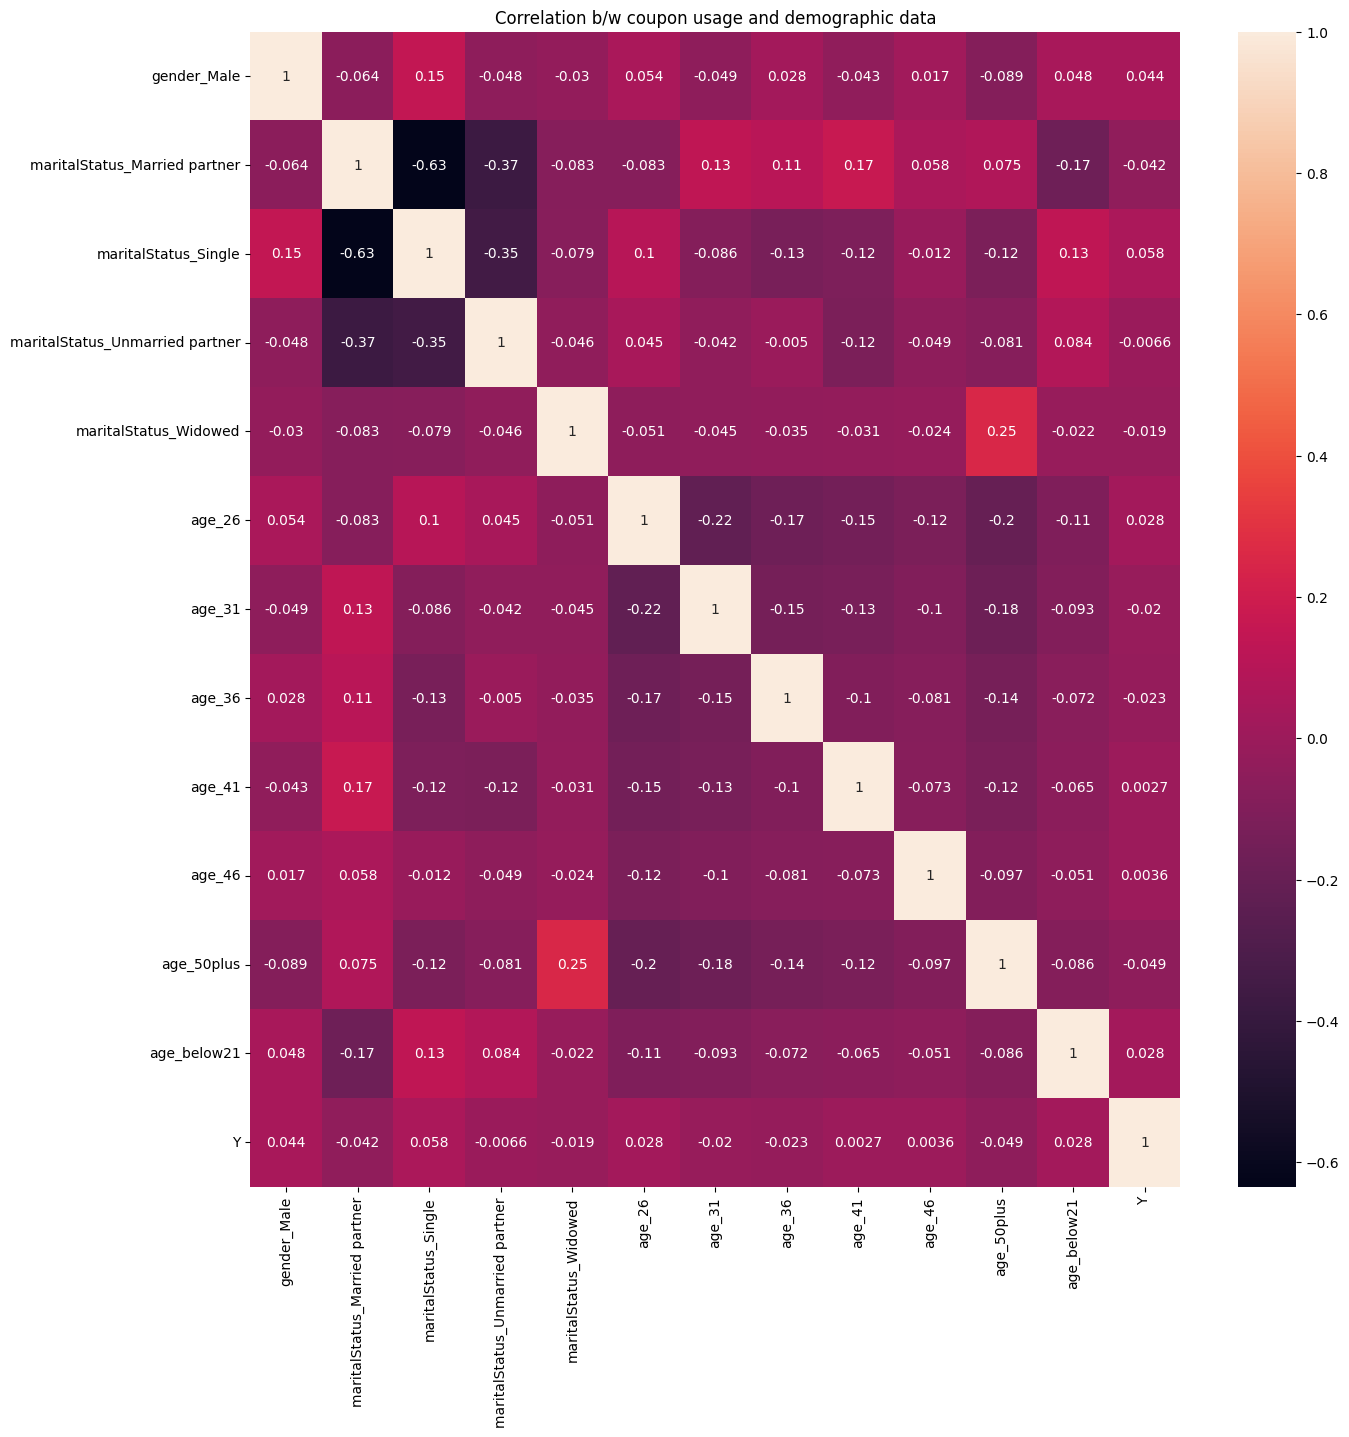

In [206]:
gender = df[['gender']]
maritalStatus = df[['maritalStatus']]
age = df[['age']]
couponUsage = df[['Y']]

# Convert categorical variables into dummy/indicator variables
gender_dummies = pd.get_dummies(gender, drop_first=True)
maritalStatus_dummies = pd.get_dummies(maritalStatus, drop_first=True)
age_dummies = pd.get_dummies(age, drop_first=True)

# Merge the DataFrames
data = pd.concat([gender_dummies, maritalStatus_dummies, age_dummies, couponUsage], axis=1)

# Calculate correlation matrix
correlation_matrix = data.corr()

# Set figure size
plt.figure(figsize=(15, 15))

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation b/w coupon usage and demographic data')
plt.show()

4. What proportion of the total observations chose to accept the coupon?

In [207]:
# proportion of all total observations chose coupon usage
df['Y'].mean()


np.float64(0.5684326710816777)

5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 1.0, 'Coupon usage by destination')

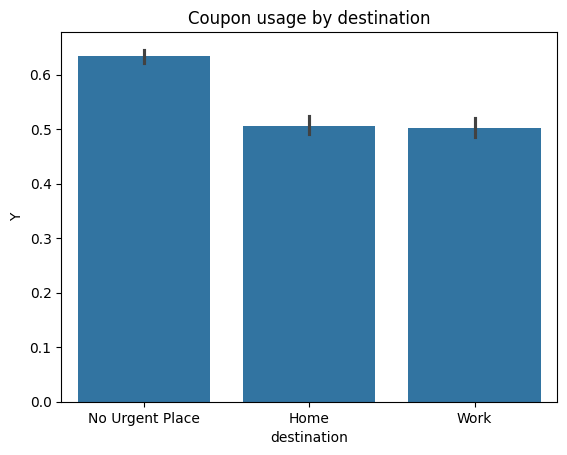

In [208]:
# bar plot of coupon usage by destination
sns.barplot(x='destination', y='Y', data=df)
plt.title('Coupon usage by destination')

Text(0.5, 1.0, 'Coupon usage by weather')

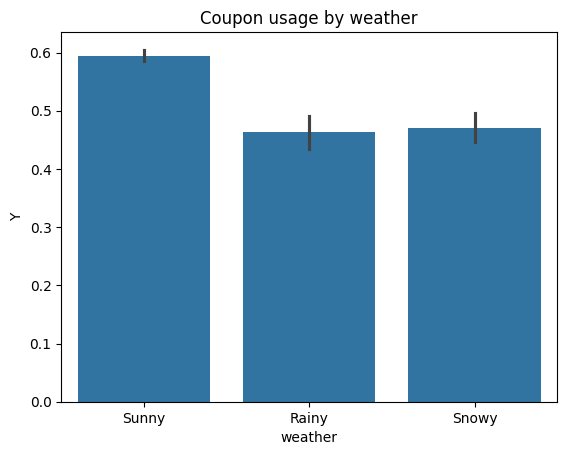

In [209]:
# bar plot of coupon usage by weather
sns.barplot(x='weather', y='Y', data=df)
plt.title('Coupon usage by weather')


Text(0.5, 1.0, 'Coupon usage by time')

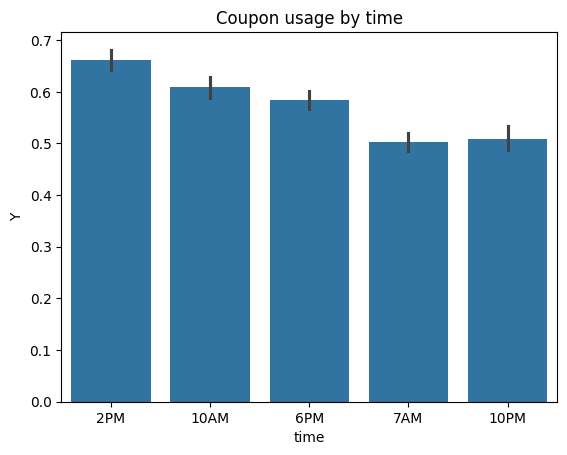

In [210]:
# bar plot of coupon usage by time
sns.barplot(x='time', y='Y', data=df)
plt.title('Coupon usage by time')


Text(0.5, 1.0, 'Coupon usage by age')

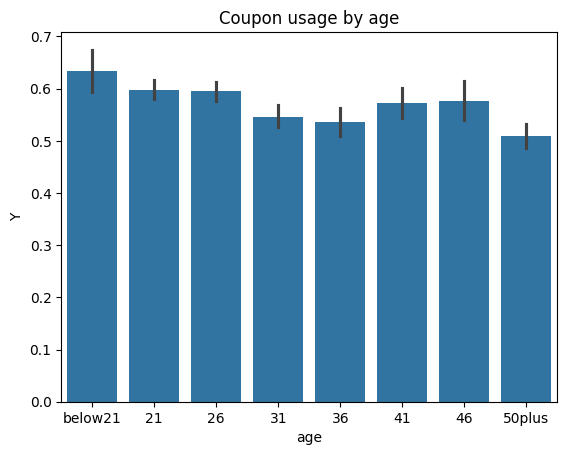

In [211]:
# bar plot of coupon usage by age

# specify the age order
age_order = ['below21', '21', '26', '31', '36', '41', '46', '50plus']
sns.barplot(x='age', y='Y', data=df, order=age_order)
plt.title('Coupon usage by age')


6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Histogram of temperature')

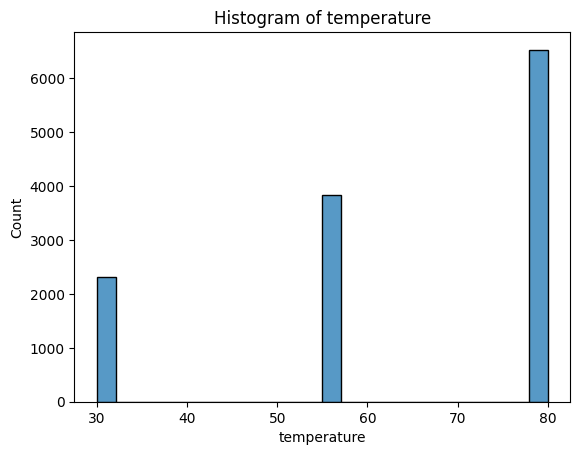

In [212]:
# histogram of temperature column
sns.histplot(df['temperature'])
plt.title('Histogram of temperature')


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.

In [213]:
# new dataframe with only the bar coupons
df_bar = df[df['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?

In [214]:
# proportion of bar coupons that were used
df_bar['Y'].mean()

np.float64(0.41001487357461575)

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

In [215]:
# 'destination', 'weather', 'age', 'time' and account for the proportion of bar coupons that were used
df_bar.groupby(['destination', 'weather', 'age', 'time'])['Y'].mean().reset_index(name='mean_coupon_usage').query('mean_coupon_usage > 0.65')


,destination,weather,age,time,mean_coupon_usage
7,Home,Rainy,41,6PM,0.666667
25,Home,Sunny,below21,10PM,0.833333
29,No Urgent Place,Rainy,21,6PM,0.714286
41,No Urgent Place,Rainy,41,6PM,1.000000
66,No Urgent Place,Sunny,21,10PM,0.700000
67,No Urgent Place,Sunny,21,2PM,0.666667
70,No Urgent Place,Sunny,26,10PM,0.730769
79,No Urgent Place,Sunny,36,6PM,0.666667
81,No Urgent Place,Sunny,41,10PM,0.687500
83,No Urgent Place,Sunny,41,6PM,0.833333


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?

In [216]:
# count of number of observations for age over 25
df_over25 = df[df['age'] == '26'].shape[0] + df[df['age'] == '31'].shape[0] + df[df['age'] == '36'].shape[0] + df[df['age'] == '41'].shape[0] + df[df['age'] == '46'].shape[0] + df[df['age'] == '50plus'].shape[0]

# count of number of observations of df_over25 that went to bar
df_over25_bar = df[(df['age'] == '26') & (df['coupon'] == 'Bar')].shape[0] + df[(df['age'] == '31') & (df['coupon'] == 'Bar')].shape[0] + df[(df['age'] == '36') & (df['coupon'] == 'Bar')].shape[0] + df[(df['age'] == '41') & (df['coupon'] == 'Bar')].shape[0] + df[(df['age'] == '46') & (df['coupon'] == 'Bar')].shape[0] + df[(df['age'] == '50plus') & (df['coupon'] == 'Bar')].shape[0]

# proportion of people over 25 who went to bar
prop_over_25_bar = df_over25_bar / df_over25

# count of number of observations of df_over25 that went to bar more than once and accepted coupon
df_over25_bar_twice_plus_coupon = df[(df['age'] == '26') & (df['coupon'] == 'Bar') & (df['Y'] == 1)].shape[0] + df[(df['age'] == '31') & (df['coupon'] == 'Bar') & (df['Y'] == 1)].shape[0] + df[(df['age'] == '36') & (df['coupon'] == 'Bar') & (df['Y'] == 1)].shape[0] + df[(df['age'] == '41') & (df['coupon'] == 'Bar') & (df['Y'] == 1)].shape[0] + df[(df['age'] == '46') & (df['coupon'] == 'Bar') & (df['Y'] == 1)].shape[0] + df[(df['age'] == '50plus') & (df['coupon'] == 'Bar') & (df['Y'] == 1)].shape[0]

# proportion of people over 25 who went to bar more than once
prop_over_25_bar_more_plus_coupon = df_over25_bar_twice_plus_coupon / df_over25

# prop_over_25_bar_twice 

print(prop_over_25_bar, prop_over_25_bar_more_plus_coupon)

0.15953184310417545 0.06115563053563897


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.

In [217]:
df_over25_bar_twice_passenger_plus_coupon = \
    df[(df['age'] == '26') & (df['coupon'] == 'Bar') & (df['Y'] == 1) & (df['passanger'] != 'Alone') & (df['passanger'] != 'Kid(s)') & (df['occupation'] != 'Farming Fishing & Forestry')].shape[0] \
    + df[(df['age'] == '31') & (df['coupon'] == 'Bar') & (df['Y'] == 1) & (df['passanger'] != 'Alone') & (df['passanger'] != 'Kid(s)') & (df['occupation'] != 'Farming Fishing & Forestry')].shape[0] \
    + df[(df['age'] == '36') & (df['coupon'] == 'Bar') & (df['Y'] == 1) & (df['passanger'] != 'Alone') & (df['passanger'] != 'Kid(s)') & (df['occupation'] != 'Farming Fishing & Forestry')].shape[0] \
    + df[(df['age'] == '41') & (df['coupon'] == 'Bar') & (df['Y'] == 1) & (df['passanger'] != 'Alone') & (df['passanger'] != 'Kid(s)') & (df['occupation'] != 'Farming Fishing & Forestry')].shape[0] \
    + df[(df['age'] == '46') & (df['coupon'] == 'Bar') & (df['Y'] == 1) & (df['passanger'] != 'Alone') & (df['passanger'] != 'Kid(s)') & (df['occupation'] != 'Farming Fishing & Forestry')].shape[0] \
    + df[(df['age'] == '50plus') & (df['coupon'] == 'Bar') & (df['Y'] == 1) & (df['passanger'] != 'Alone') & (df['passanger'] != 'Kid(s)') & (df['occupation'] != 'Farming Fishing & Forestry')].shape[0]
df_over25_bar_twice_passenger_plus_coupon / df_over25

0.021615352172079293

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.

In [218]:
df_bar_more_than_twice_with_passenger_notkid_notwidowed = df[(df['coupon'] == 'Bar') & (df['Y'] == 1) & (df['passanger'] != 'Kid(s)') & (df['maritalStatus'] != 'Widowed')].shape[0]
df_total = df.shape[0]
rate_drinkers_widowed_partners = df_bar_more_than_twice_with_passenger_notkid_notwidowed / df_over25

df_bar_more_than_twice_under_30 = df[(df['coupon'] == 'Bar') & (df['Y'] == 1) & (df['age'] == 'below21')].shape[0] \
    + df[(df['coupon'] == 'Bar') & (df['Y'] == 1) & (df['age'] == '21')].shape[0] \
    + df[(df['coupon'] == 'Bar') & (df['Y'] == 1) & (df['age'] == '26')].shape[0]
rate_over_30_drinkers = df_bar_more_than_twice_under_30 / df_over25

print(rate_drinkers_widowed_partners, rate_over_30_drinkers)

0.08192745676929565 0.046393926613243354


In [219]:
df['income'].value_counts()

income
$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: count, dtype: int64

In [220]:
df_go_to_cheap_restaurant = df[(df['coupon'] == 'Restaurant(<20)')].shape[0]
df_go_to_cheap_restaurant_four_times = df[(df['coupon'] == 'Restaurant(<20)') & (df['Y'] == 1)].shape[0]
df_go_to_cheap_restaurant_four_times_low_income = df[(df['coupon'] == 'Restaurant(<20)') & (df['Y'] == 1) & ((df['income'] == '$25000 - $37499') | (df['income'] == '$12500 - $24999') | (df['income'] == '$37500 - $49999') | (df['income'] == 'Less than $12500'))].shape[0]
df_go_to_cheap_restaurant_four_times_low_income / df.shape[0]

0.0826237779880164

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

- 15% of people over 25 visit bars, and 6.2% of people accept coupons

- Widowed with adult passengers are likely to accept coupons 8.2% of the time. Almost twice higher compared to those over 30 driving alone.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [221]:
df['time'].value_counts()

time
6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: count, dtype: int64

In [222]:
# destination seems to be a good predictor of coupon usage
proportion_of_coupon_usage_by_destination = df[(df['destination'] == 'No Urgent Place') & (df['Y'] == 1)].shape[0] / df.shape[0]
proportion_of_coupon_usage_by_destination

# time seems to be a good predictor of coupon usage. Lets figure out what times are most popular for coupon usage

# proportion of coupon usage by time
proportion_of_coupon_usage_at7am = df[(df['time'] == '7AM') & (df['Y'] == 1)].shape[0] / df.shape[0]
proportion_of_coupon_usage_at10am = df[(df['time'] == '10AM') & (df['Y'] == 1)].shape[0] / df.shape[0]
proportion_of_coupon_usage_at2pm = df[(df['time'] == '2PM') & (df['Y'] == 1)].shape[0] / df.shape[0]
proportion_of_coupon_usage_at6pm = df[(df['time'] == '6PM') & (df['Y'] == 1)].shape[0] / df.shape[0]
proportion_of_coupon_usage_at10pm = df[(df['time'] == '10PM') & (df['Y'] == 1)].shape[0] / df.shape[0]

print(proportion_of_coupon_usage_at7am, proportion_of_coupon_usage_at10am, proportion_of_coupon_usage_at2pm, proportion_of_coupon_usage_at6pm, proportion_of_coupon_usage_at10pm)


0.12527593818984548 0.10911384421318196 0.10477767265846737 0.1488489435509303 0.0804162724692526


coupon
Carry out & Take away    499
Coffee House             407
Restaurant(<20)          334
Bar                      178
Restaurant(20-50)        171
Name: count, dtype: int64 coupon
Coffee House             576
Carry out & Take away    363
Restaurant(<20)          215
Bar                      161
Restaurant(20-50)         69
Name: count, dtype: int64 coupon
Restaurant(<20)          567
Coffee House             435
Carry out & Take away    189
Restaurant(20-50)         98
Bar                       40
Name: count, dtype: int64 coupon
Restaurant(<20)          619
Coffee House             451
Carry out & Take away    359
Bar                      264
Restaurant(20-50)        195
Name: count, dtype: int64 coupon
Carry out & Take away    350
Restaurant(<20)          235
Bar                      184
Coffee House             126
Restaurant(20-50)        125
Name: count, dtype: int64


Text(0.5, 1.0, 'Coupon usage by time')

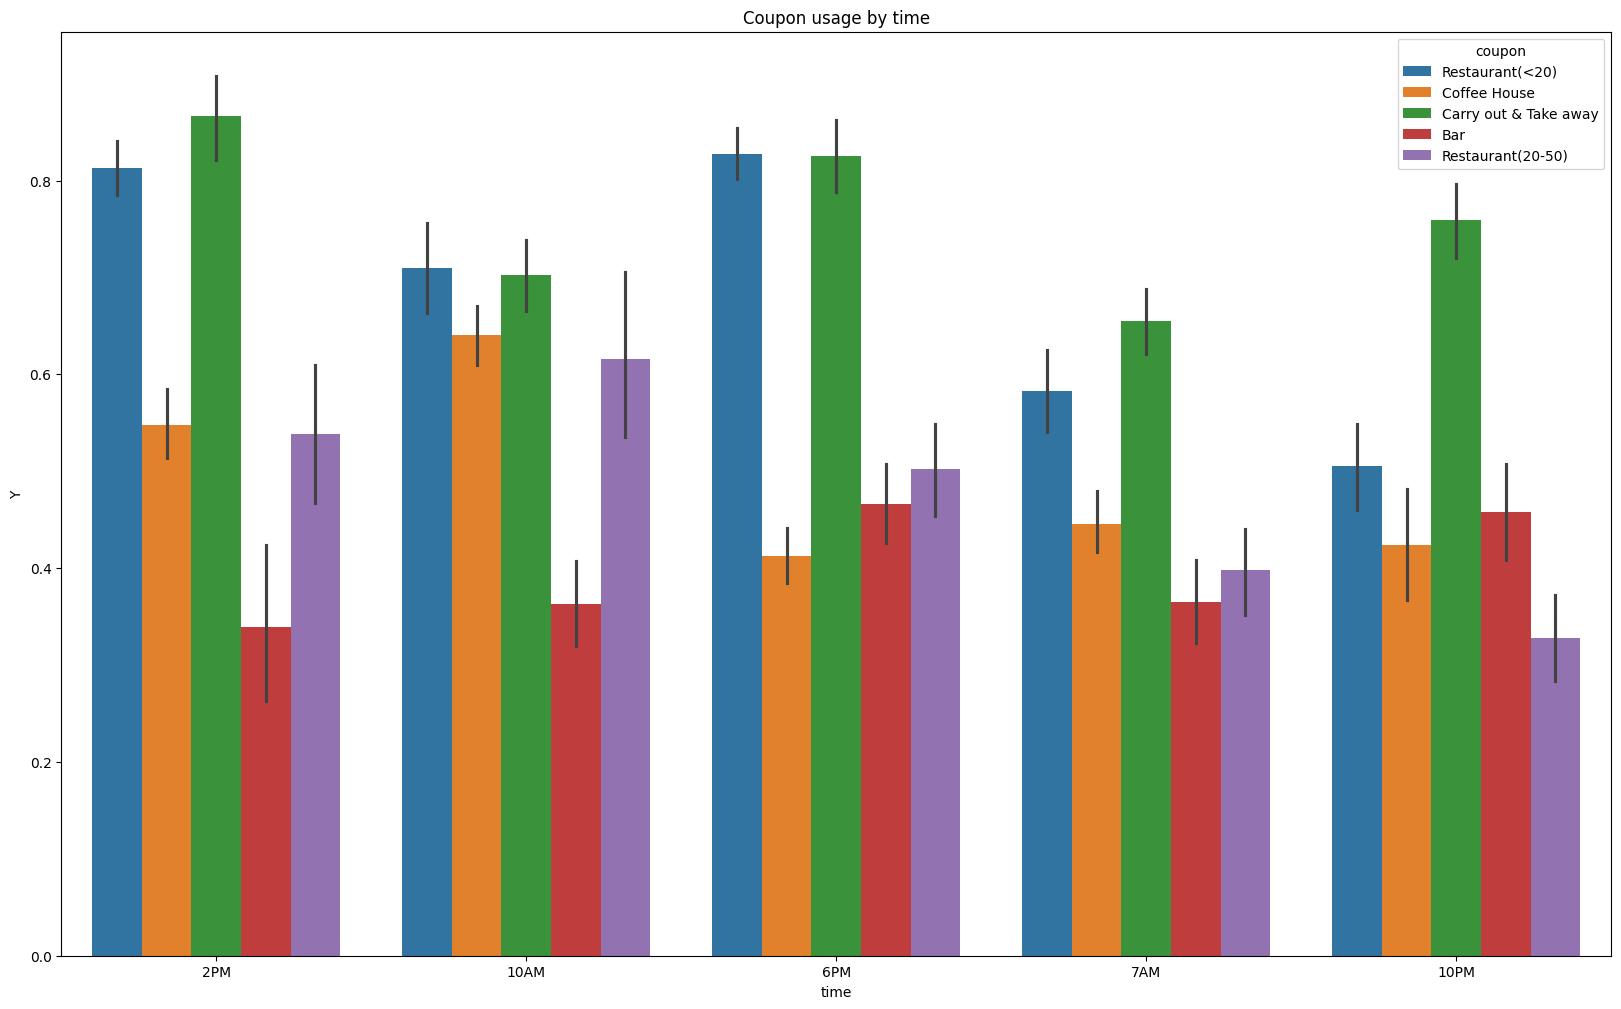

In [223]:
# what coupon types are most popular at 7am
coupons_at7am = df[(df['time'] == '7AM') & (df['Y'] == 1)]['coupon'].value_counts()

# what coupon types are most popular at 10am
coupons_at10am = df[(df['time'] == '10AM') & (df['Y'] == 1)]['coupon'].value_counts()

# what coupon types are most popular at 2pm
coupons_at2pm = df[(df['time'] == '2PM') & (df['Y'] == 1)]['coupon'].value_counts()

# what coupon types are most popular at 6pm
coupons_at6pm = df[(df['time'] == '6PM') & (df['Y'] == 1)]['coupon'].value_counts()

# what coupon types are most popular at 10pm
coupons_at10pm = df[(df['time'] == '10PM') & (df['Y'] == 1)]['coupon'].value_counts()

print(coupons_at7am, coupons_at10am, coupons_at2pm, coupons_at6pm, coupons_at10pm)

# bar plot of coupon usage by time color by coupon type
plt.figure(figsize=(20, 12))
sns.barplot(x='time', y='Y', hue='coupon', data=df)
plt.title('Coupon usage by time')



Text(0.5, 1.0, 'Carry out & Take away by destination')

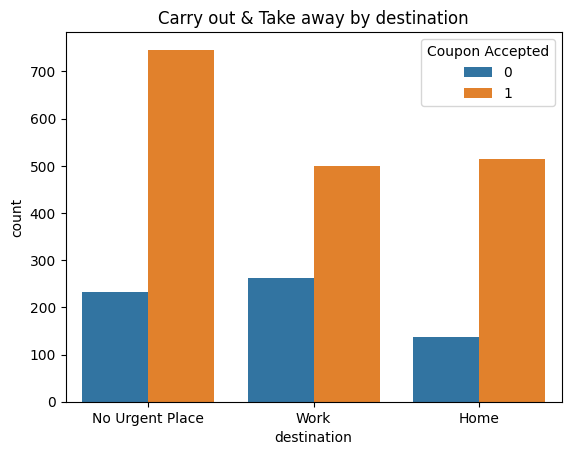

In [224]:
# if carry out is our target coupon, whats our target demographic?

sns.countplot(x='destination', data=df[(df['coupon'] =='Carry out & Take away')], hue='Y')
plt.legend(title='Coupon Accepted')
plt.title('Carry out & Take away by destination')


Text(0.5, 1.0, 'Carry out & Take away by age')

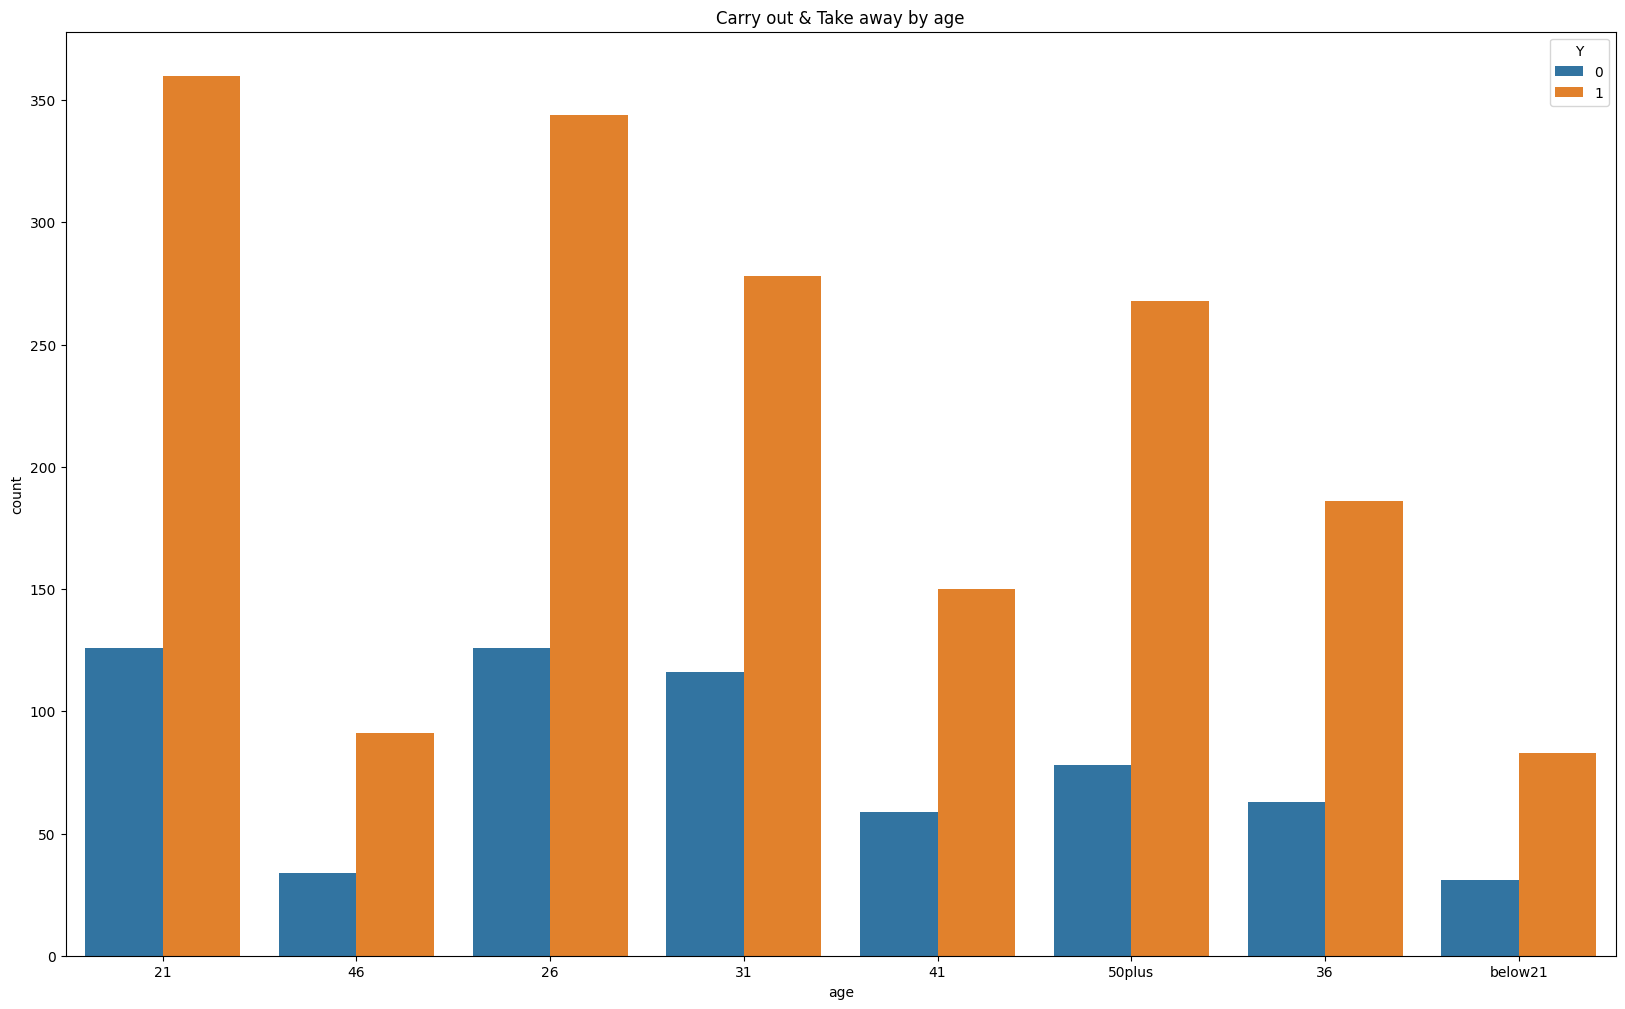

In [225]:
# if carry out is our target coupon, whats our target demographic?

# alternate approach using seaborn, add hue to color by Y
plt.figure(figsize=(20, 12))

sns.countplot(x='age', data=df[(df['coupon'] =='Carry out & Take away')], hue='Y')
plt.title('Carry out & Take away by age')


<Axes: title={'center': 'Carry out & Take away by Time'}, xlabel='time'>

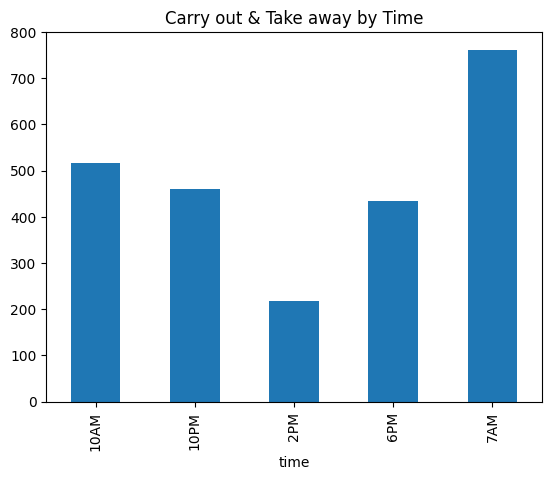

In [226]:
# if carry out is our target coupon, whats our target demographic?

df[(df['coupon'] =='Carry out & Take away')].groupby('time').size().plot(kind='bar', title='Carry out & Take away by Time')

<Axes: title={'center': 'Coupon usage at 7am and 21 year old'}, xlabel='destination,coupon'>

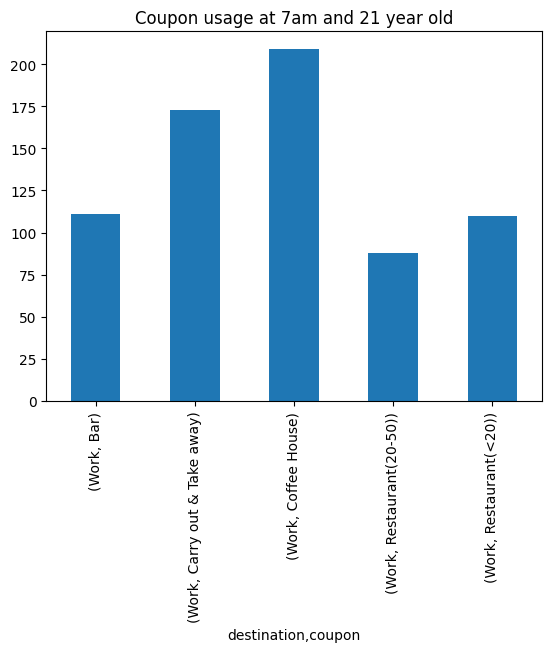

In [227]:
# plot of coupon usage by time color by coupon type and destination and at 7am and 21 year olds

df[(df['time'] == '7AM') & (df['age'] == '21')].groupby(['destination', 'coupon']).size().plot(kind='bar', title='Coupon usage at 7am and 21 year old')


In [228]:
# Target demographic for carry out and take away is 21 year olds who are going to work and are in a hurry. They are likely to use the coupon at 7am.

<Axes: title={'center': 'Coupon usage by 50plus, divorced, not in a hurry and adult passengers'}, xlabel='coupon'>

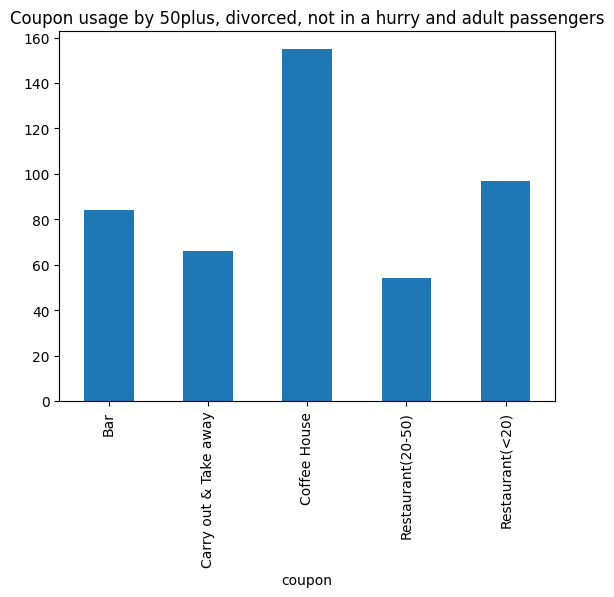

In [229]:
# what are the target coupons for age 50plus, divorced, not in a hurry and adult passengers

df[(df['age'] == '50plus') & (df['time'] == '6PM')].groupby('coupon').size().plot(kind='bar', title='Coupon usage by 50plus, divorced, not in a hurry and adult passengers')



In [230]:
# For 50+ year olds who are divorced, not in a hurry and have adult passengers, the target coupon is Coffee House, restaurant<20 and Bar at 6PM

<Axes: title={'center': 'Coupon usage by 50plus, divorced, not in a hurry and adult passengers'}, xlabel='coupon'>

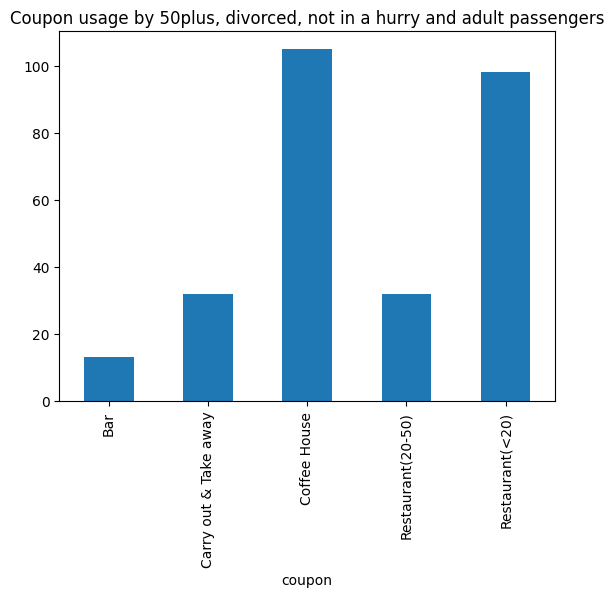

In [231]:
# what are the target coupons for age 50plus, divorced, not in a hurry and adult passengers

df[(df['age'] == '50plus') & (df['time'] == '2PM')].groupby('coupon').size().plot(kind='bar', title='Coupon usage by 50plus, divorced, not in a hurry and adult passengers')



In [232]:
# at 2 pm the target coupon for 50+ year olds who are divorced, not in a hurry and have adult passengers is Coffee House and restaurant<20